In [344]:
import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression,LinearRegression,Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import (accuracy_score, mean_squared_error, r2_score, precision_score, recall_score, f1_score,)

---
Xu Li Du Lieu


In [345]:
#doc file dataset
df=pd.read_csv("dataset/bank.csv", sep=';')
print(df)

      age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  duration  campaign  pdays  previous 

In [346]:
#tao cot id
df_user=pd.DataFrame(np.arange(0,len(df)), columns=['id'])
df=pd.concat([df_user, df], axis=1)

In [347]:
#xem du lieu cot
print(df.columns)

Index(['id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')


In [348]:
#xem du lieu dau (5 dong dau)
df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [349]:
#xem info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         4521 non-null   int64 
 1   age        4521 non-null   int64 
 2   job        4521 non-null   object
 3   marital    4521 non-null   object
 4   education  4521 non-null   object
 5   default    4521 non-null   object
 6   balance    4521 non-null   int64 
 7   housing    4521 non-null   object
 8   loan       4521 non-null   object
 9   contact    4521 non-null   object
 10  day        4521 non-null   int64 
 11  month      4521 non-null   object
 12  duration   4521 non-null   int64 
 13  campaign   4521 non-null   int64 
 14  pdays      4521 non-null   int64 
 15  previous   4521 non-null   int64 
 16  poutcome   4521 non-null   object
 17  y          4521 non-null   object
dtypes: int64(8), object(10)
memory usage: 635.9+ KB


In [350]:
#xem thong ke
df.describe()

,id,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,2260.000000,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,1305.244613,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,0.000000,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,1130.000000,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,2260.000000,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,3390.000000,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,4520.000000,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [351]:
#Kiem tra kieu du lieu cua cac cot,
print("Kieu du lieu cac cot:\n", df.dtypes)

#Chon cac cot kieu so va nhom trung binh theo 'y',
if 'y' in df.columns:
    ket_qua=df.select_dtypes(include=[np.number]).groupby(df['y']).mean()
    print(ket_qua)
else:
    print("Khong co cot y trong DF.")


Kieu du lieu cac cot:
 id            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object
              id        age      balance        day    duration  campaign  \
y                                                                           
no   2261.324500  40.998000  1403.211750  15.948750  226.347500  2.862250   
yes  2249.831094  42.491363  1571.955854  15.658349  552.742802  2.266795   

         pdays  previous  
y                         
no   36.006000  0.471250  
yes  68.639155  1.090211  


In [352]:
#Kiem tra cac cot trong DF
print("Các cột trong DataFrame:", df.columns)

#Kiem tra cot y, va tan suat
if 'y' in df.columns:
    print(df['y'].value_counts())
else:
    print("Khong co y trong DF.")

Các cột trong DataFrame: Index(['id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')
y
no     4000
yes     521
Name: count, dtype: int64


In [353]:
#Kiem tra xem co gia tri null trong moi cot hay khong
print("Kiem tra xem co gia tri null trong moi cot hay khong:\n",df.isna().any())

Kiem tra xem co gia tri null trong moi cot hay khong:
 id           False
age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool


In [354]:
#Kiem tra so luong gia tri toi thieu trong moi cot
print("So luong gia tri toi thieu trong moi cot:\n", df.isnull().sum())

So luong gia tri toi thieu trong moi cot:
 id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [355]:
#Coi cac gia tri uni trong cot 'y'
if 'y' in df.columns:
    print("Cac gia tri unique trong cot 'y':", df['y'].unique())

Cac gia tri unique trong cot 'y': ['no' 'yes']


In [356]:
#Kiem tra age co gia tri am hay khong
if 'age' in df.columns:
    print("Du lieu vo li trong 'age':\n", df[df['age'] < 0])

Du lieu vo li trong 'age':
 Empty DataFrame
Columns: [id, age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, y]
Index: []


In [357]:
#Kiem tra cac gia tri trung lap
print("So luog dong trung lap:", df.duplicated().sum())

So luog dong trung lap: 0


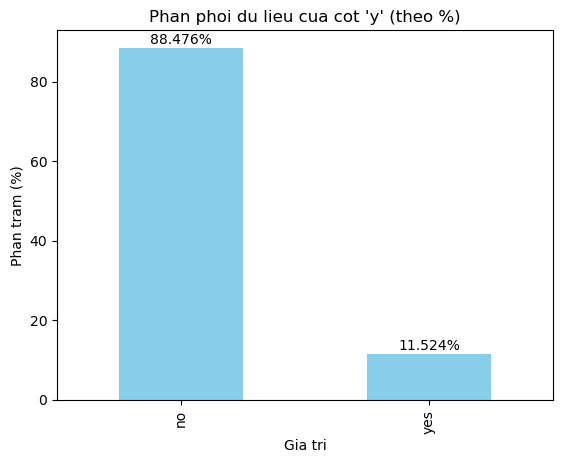

In [358]:
#Kiem tra va tinh phan tram cot y (neuco)
if 'y' in df.columns:
  #Tinh%
    y_percent=df['y'].value_counts(normalize=True) * 100

  #Ve bieu do
    ax=y_percent.plot(kind='bar', color='skyblue')
    plt.title("Phan phoi du lieu cua cot 'y' (theo %)")
    plt.xlabel("Gia tri")
    plt.ylabel("Phan tram (%)")

  #In them % len cot
    for i in range(len(y_percent)):
        ax.text(i, y_percent.iloc[i] + 1, f"{y_percent.iloc[i]:.3f}%", ha='center')

    plt.show()
else:
    print("Khong co y trong DF.")

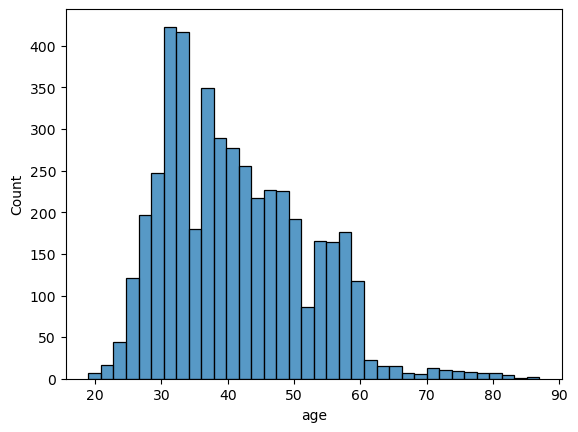

In [359]:
#Bd phan phoi tuoi
sns.histplot(df['age'])
plt.show()

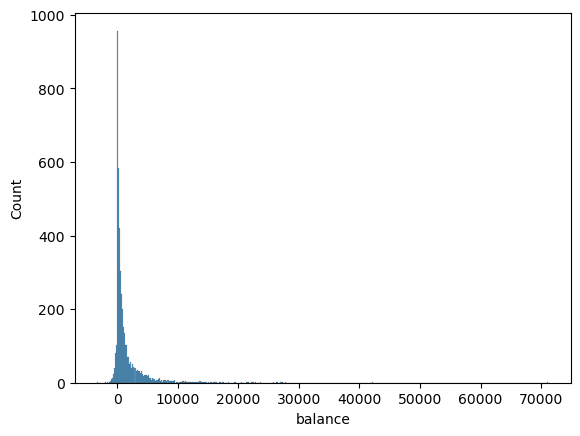

In [360]:
#Bd phan phoi balance
sns.histplot(df['balance'])
plt.show()

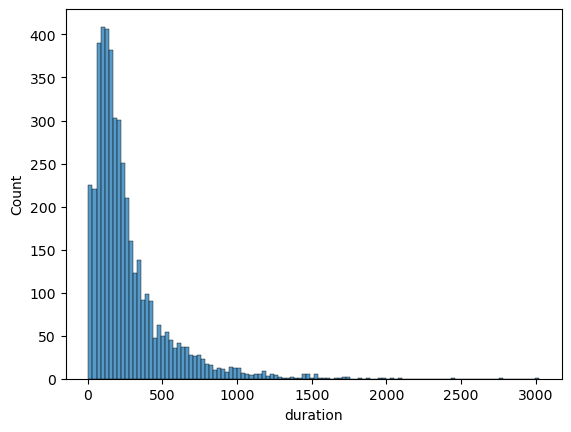

In [361]:
#Bd phan phoi duration
sns.histplot(df['duration'])
plt.show()

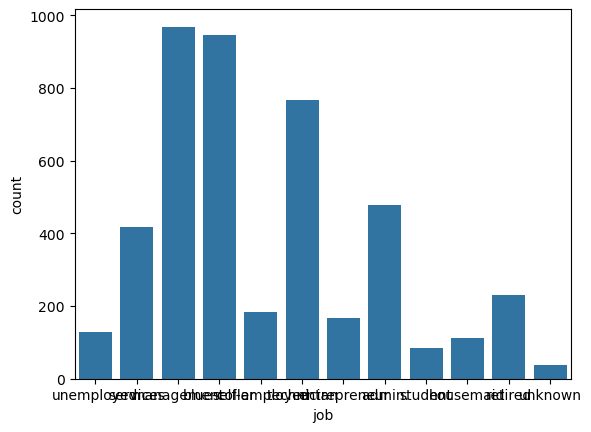

In [362]:
#Bd phan phoi thuoc tinhpl
sns.countplot(x='job', data=df)
plt.show()

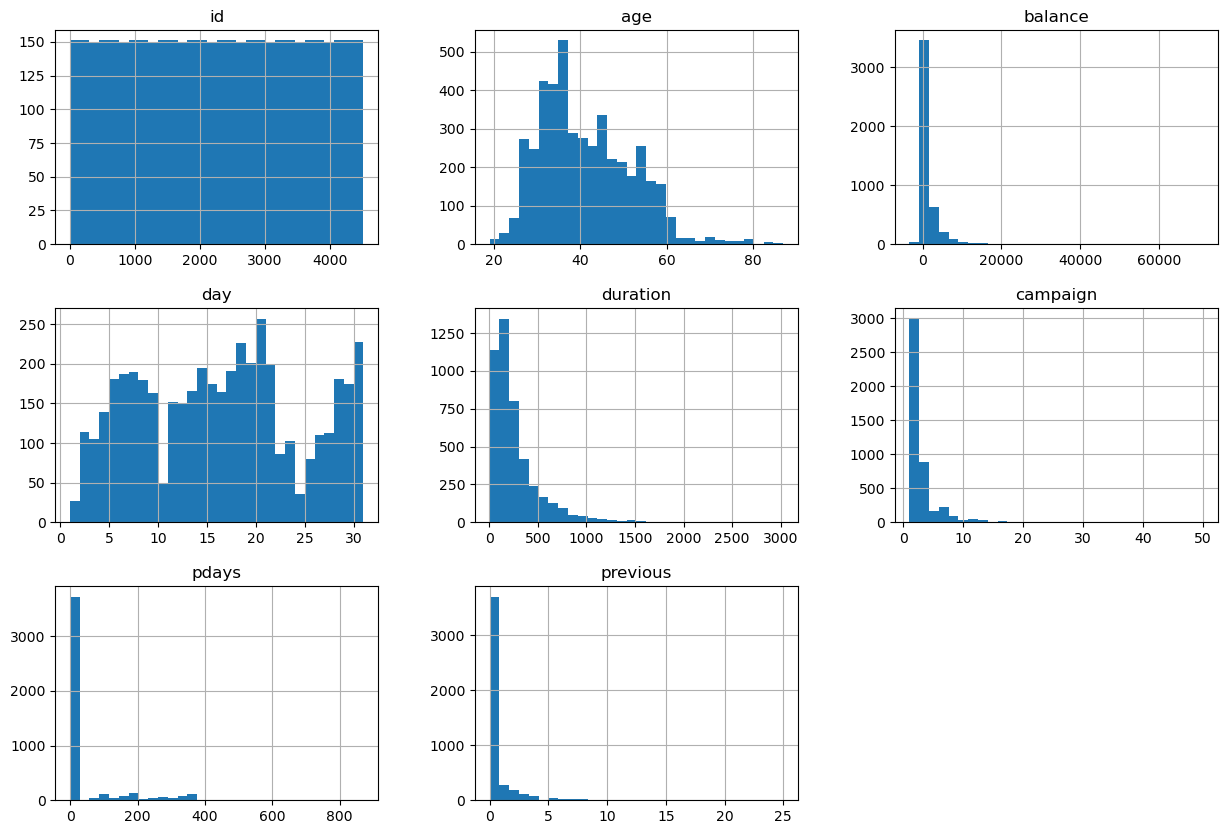

In [363]:
#Phan phoi dac trung so
df.hist(bins=30, figsize=(15, 10))
plt.show()

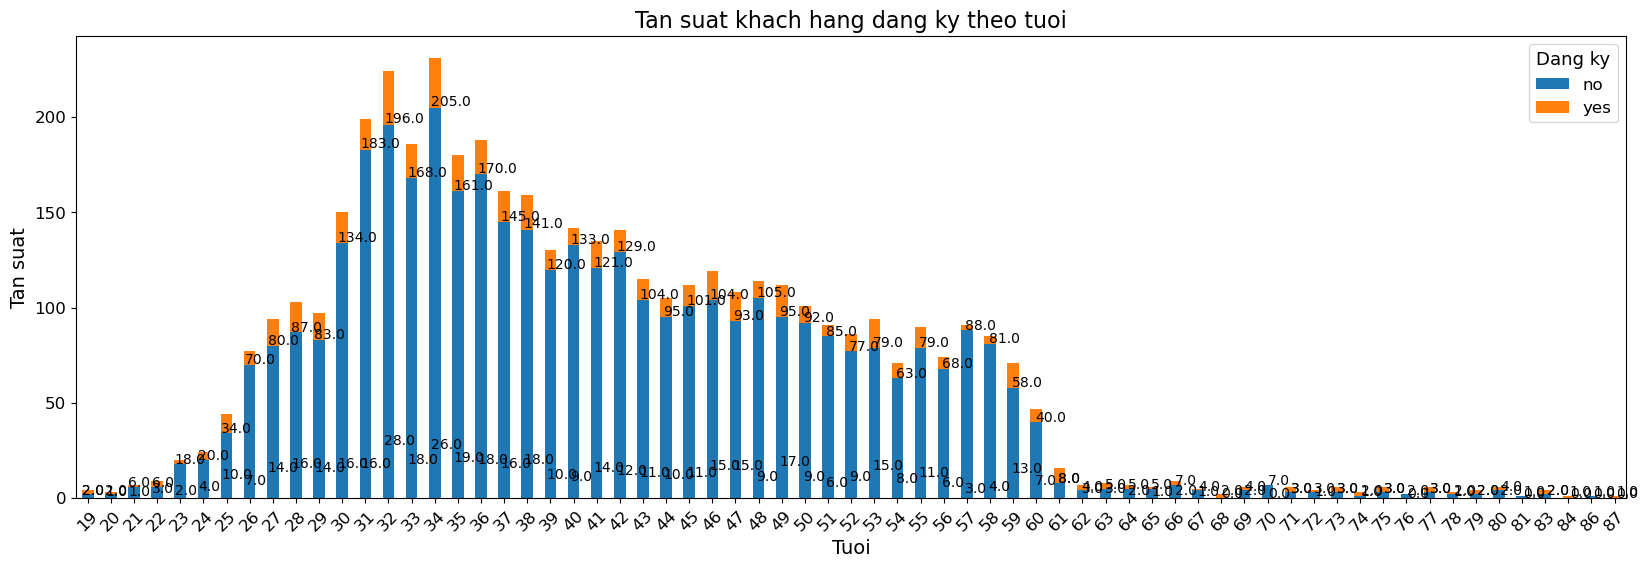

In [364]:
#Tao bang crosstab
crosstab=pd.crosstab(df.age, df.y)

#Ve bieu do
fig, ax=plt.subplots(figsize=(20, 6))
crosstab.plot(kind="bar", stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'])

#Them tieu de va nhan truc
plt.title('Tan suat khach hang dang ky theo tuoi', fontsize=16)
plt.xlabel('Tuoi', fontsize=14)
plt.ylabel('Tan suat', fontsize=14)

#Them nhan du lieu
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

#Tuy chinh truc x va y
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Dang ky', fontsize=12, title_fontsize='13')

#Hien thi bieu do
plt.show()

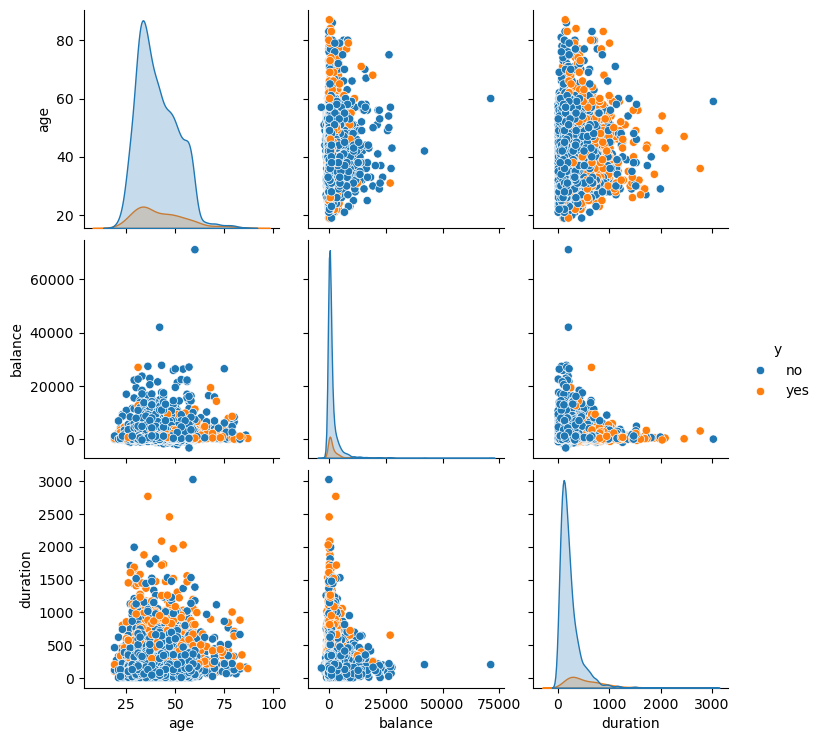

In [365]:
sns.pairplot(data=df, hue='y', vars=['age', 'balance', 'duration'])

In [366]:
#Chuyen doi kieu du lieu
df['age']=df['age'].astype(float)
df['balance']=df['balance'].astype(float)
df['duration']=df['duration'].astype(float)
df['campaign']=df['campaign'].astype(int)
df['pdays']=df['pdays'].astype(int)
df['previous']=df['previous'].astype(int)

In [367]:
#Lay X,y
X=df.drop(['y', 'id', 'job', 'marital', 'education', 'contact', 
              'housing', 'loan', 'day', 'month', 'poutcome'], axis=1)
y=df['y']

#Ma hoa
#drop_first de tranh dummy variable trap
X=pd.get_dummies(X, drop_first=True)

y=pd.get_dummies(y).drop(['yes'], axis=1).rename(columns={'no': 'y'})

#In shape X,y
print("\nX shape:", X.shape)
print("y shape:", y.shape)

print(X)
print(y)


X shape: (4521, 7)
y shape: (4521, 1)
       age  balance  duration  campaign  pdays  previous  default_yes
0     30.0   1787.0      79.0         1     -1         0        False
1     33.0   4789.0     220.0         1    339         4        False
2     35.0   1350.0     185.0         1    330         1        False
3     30.0   1476.0     199.0         4     -1         0        False
4     59.0      0.0     226.0         1     -1         0        False
...    ...      ...       ...       ...    ...       ...          ...
4516  33.0   -333.0     329.0         5     -1         0        False
4517  57.0  -3313.0     153.0         1     -1         0         True
4518  57.0    295.0     151.0        11     -1         0        False
4519  28.0   1137.0     129.0         4    211         3        False
4520  44.0   1136.0     345.0         2    249         7        False

[4521 rows x 7 columns]
         y
0     True
1     True
2     True
3     True
4     True
...    ...
4516  True
4517  Tr

In [368]:
#Kiem tra du lieu X
print("Cac cot trog X:", X.columns.tolist())

Cac cot trog X: ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'default_yes']


In [369]:
#Tach thanh tap huan luyen va tap kiem tra
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.5, stratify=y, random_state=0)

In [370]:
#In shape
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2260, 7) (2261, 7) (2260, 1) (2261, 1)


---
Can Bang Du Lieu

In [371]:
##Dem so luong gia tri cua y trong tap y_train
# y_train['y'].value_counts()

In [372]:
##Xac dinh chi muc cho lop duong va am.
# pos_index=y_train[y_train.values==1].index
# neg_index=y_train[y_train.values==0].index

In [373]:
##So sanh so luong mau giua 2 lop.
##Xac dinh lop nao co nhieu mau hon.
# if len(pos_index) > len(neg_index):
#     higher=pos_index
#     lower=neg_index
# else:
#     higher=neg_index
#     lower=pos_index

# random.seed(0)
# higher=np.random.choice(higher, size=len(lower))
# lower=np.asarray(lower)
# new_indexes=np.concatenate((lower, higher))

# X_train=X_train.loc[new_indexes]
# y_train=y_train.loc[new_indexes]

In [374]:
# y_train['y'].value_counts()

---
CLASSIFICATION (PHANLOAI)

---
Logistic Regression

In [375]:
#Logistic Regression
classifier_LR=LogisticRegression(random_state=0, max_iter=500)
classifier_LR.fit(X_train, y_train.values.ravel())

#Du doan tap kiem tra
y_pred_LR=classifier_LR.predict(X_test) 

#Tinhtoan cac chi so
acc_LR=accuracy_score(y_test, y_pred_LR)
prec_LR=precision_score(y_test, y_pred_LR, pos_label=True)
rec_LR=recall_score(y_test, y_pred_LR, pos_label=True)
f1_LR=f1_score(y_test, y_pred_LR, pos_label=True)

#Tao DataFrame ket qua
results=pd.DataFrame([['Logistic Regression', acc_LR, prec_LR, rec_LR, f1_LR]], columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [376]:
#In ket qua
print(results)

                 Model  Accuracy  Precision  Recall  F1 Score
0  Logistic Regression   0.88368   0.899678  0.9775  0.936976


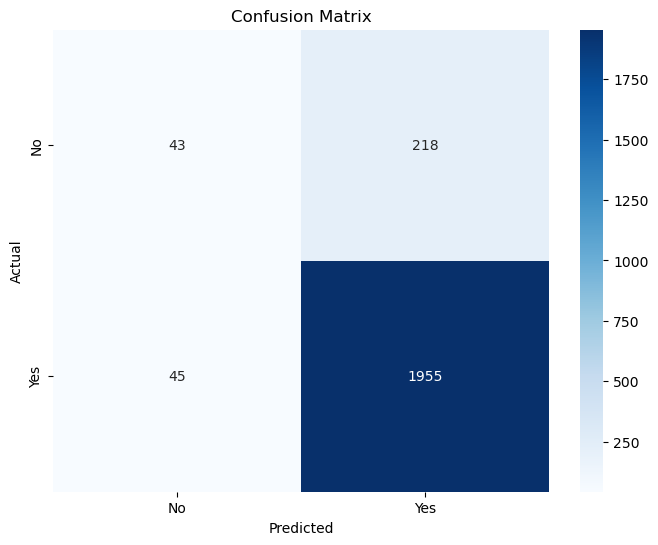

In [377]:
cm = confusion_matrix(y_test, y_pred_LR)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

---
K-Nearest Neighbors

In [378]:
#KNN
classifier_KNN=KNeighborsClassifier(n_neighbors=15, metric='minkowski', p=2)
classifier_KNN.fit(X_train, y_train.values.ravel())

#Du doan tap kiem tra
y_pred_KNN=classifier_KNN.predict(X_test)

#Tinh toan cac chi so
acc_KNN=accuracy_score(y_test, y_pred_KNN)
prec_KNN=precision_score(y_test, y_pred_KNN, pos_label=True)
rec_KNN=recall_score(y_test, y_pred_KNN, pos_label=True) 
f1_KNN=f1_score(y_test, y_pred_KNN, pos_label=True) 

#Tao DataFrame ket qua
model_results_KNN=pd.DataFrame([['KNN', acc_KNN, prec_KNN, rec_KNN, f1_KNN]],
                                  columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results=pd.concat([results, model_results_KNN], ignore_index=True)  


In [379]:
print(model_results_KNN)

  Model  Accuracy  Precision  Recall  F1 Score
0   KNN  0.881911   0.894761   0.982  0.936353


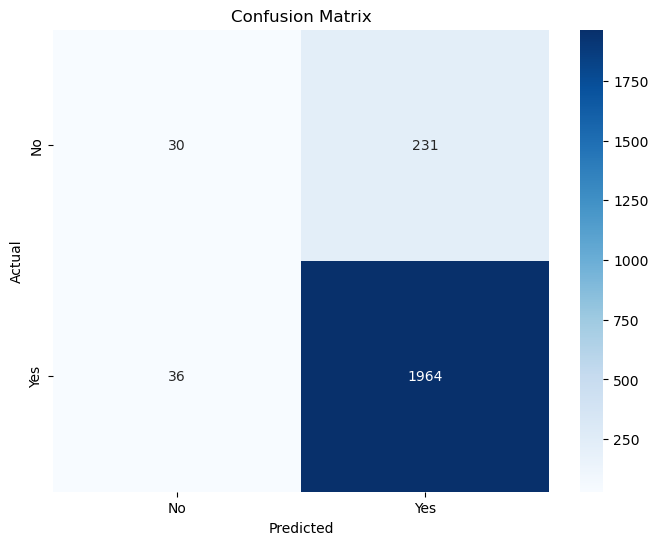

In [380]:
cm = confusion_matrix(y_test, y_pred_KNN)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

---
Decision Tree

In [381]:
#Decision Tree
classifier_DT=DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier_DT.fit(X_train, y_train.values.ravel())

#Du doan tap kiem tra
y_pred_DT=classifier_DT.predict(X_test)

#Tinh toan cac chi so
acc_DT=accuracy_score(y_test, y_pred_DT)
prec_DT=precision_score(y_test, y_pred_DT, pos_label=True) 
rec_DT=recall_score(y_test, y_pred_DT, pos_label=True)
f1_DT=f1_score(y_test, y_pred_DT, pos_label=True)

#Tao DataFrame ket qua
model_results_DT=pd.DataFrame([['Decision Tree', acc_DT, prec_DT, rec_DT, f1_DT]],
                                 columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results=pd.concat([results, model_results_DT], ignore_index=True)

In [382]:
print(model_results_DT)

           Model  Accuracy  Precision  Recall  F1 Score
0  Decision Tree  0.845201   0.914573    0.91  0.912281


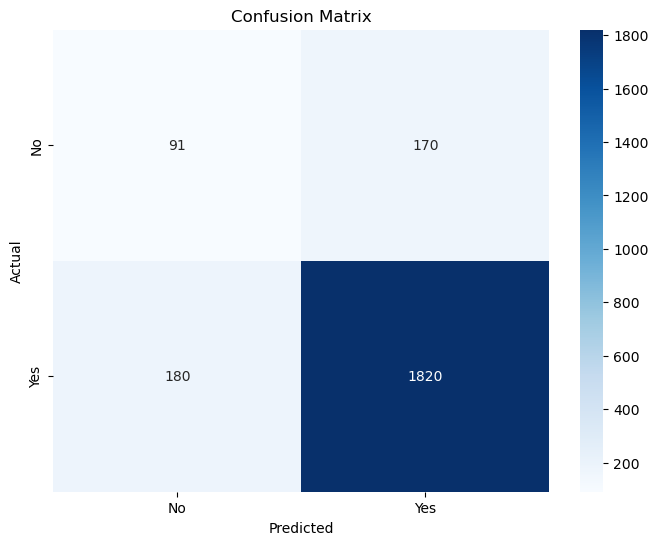

In [383]:
cm = confusion_matrix(y_test, y_pred_DT)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [384]:
print(results)

                 Model  Accuracy  Precision  Recall  F1 Score
0  Logistic Regression  0.883680   0.899678  0.9775  0.936976
1                  KNN  0.881911   0.894761  0.9820  0.936353
2        Decision Tree  0.845201   0.914573  0.9100  0.912281


---
Bieu Do So Sanh cac TT Classification

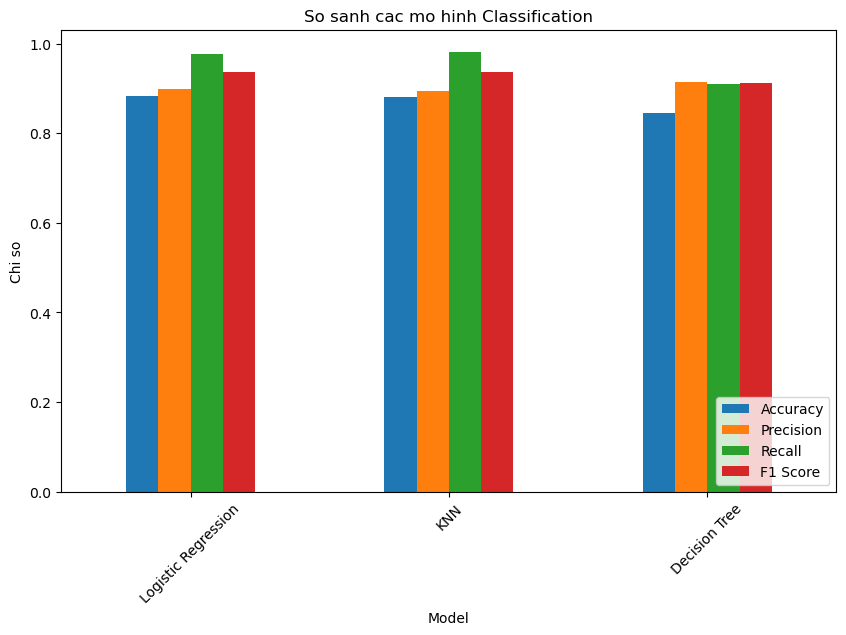

In [385]:
#So sanh KQ bang bieu do
results.set_index('Model', inplace=True)
results.plot(kind='bar', figsize=(10, 6))
plt.title('So sanh cac mo hinh Classification')
plt.ylabel('Chi so')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()

---
REGRESSION

In [386]:
#Kiem tra cot trong DF
print(df.columns)

#Kiem tra kieu du lieu tung cot
print(df.dtypes)

Index(['id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')
id             int64
age          float64
job           object
marital       object
education     object
default       object
balance      float64
housing       object
loan          object
contact       object
day            int64
month         object
duration     float64
campaign       int64
pdays          int64
previous       int64
poutcome      object
y             object
dtype: object


In [387]:
# Tạo X và y
X=df[['balance', 'duration','marital', 'education', 'default', 'housing', 'loan', 'contact', 'age', 'pdays', 'campaign', 'poutcome']]
y=df['previous']

In [388]:
# One-Hot Encoding
X=pd.get_dummies(X, columns=['marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome'], drop_first=True)

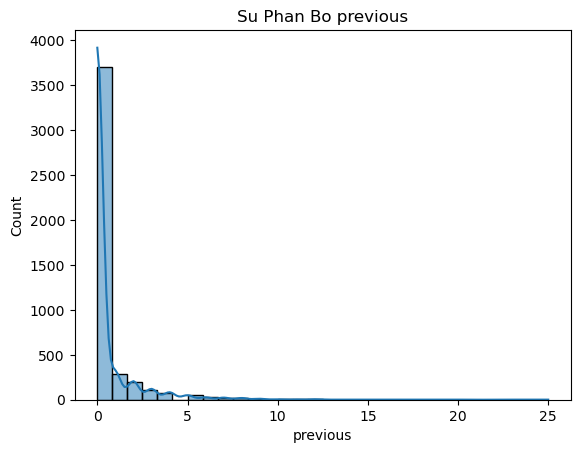

In [389]:
#Bang phan phoi tuoi
sns.histplot(y, bins=30, kde=True)
plt.title('Su Phan Bo previous')
plt.show()

In [390]:
#Tach thanh tap huan luyen va tap kiem tra
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.8, random_state=42)

---
Linear Regression

In [391]:
#LinearRegression
linear_model=LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [392]:
#Du doan tren tap kiem tra
y_pred_linear=linear_model.predict(X_test)

In [393]:
#Danh gia mo hinh
mse_linear=mean_squared_error(y_test, y_pred_linear)
rmse_linear=np.sqrt(mse_linear)
r2_linear=r2_score(y_test, y_pred_linear)

In [394]:
#Ket qua
print(f'Linear Regression RMSE: {rmse_linear}')
print(f'Linear Regression R²: {r2_linear}')

Linear Regression RMSE: 1.2567440725831558
Linear Regression R²: 0.44970478858589935


---
Random Forest

In [395]:
#Xây dựng mô hình Random Forest
rf_model=RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [396]:
#Du doan tren tap kiem tra
y_pred_rf=rf_model.predict(X_test)

In [397]:
#Danh gia mo hinh
mse_rf=mean_squared_error(y_test, y_pred_rf)
rmse_rf=np.sqrt(mse_rf)
r2_rf=r2_score(y_test, y_pred_rf)

In [398]:
#Ket qua
print(f'Random Forest RMSE: {rmse_rf}')
print(f'Random Forest R²: {r2_rf}')

Random Forest RMSE: 1.3327852539094323
Random Forest R²: 0.3810972669124737


So Sanh 2 Mo Hinh

In [399]:
#Lưu kết quả vào DataFrame để so sánh
results_regression=pd.DataFrame({
    'Mo Hinh': ['Linear Regression', 'Random Forest'],
    'RMSE': [rmse_linear, rmse_rf],
    'Rˆ2': [r2_linear, r2_rf]
})
#Hiển thị kết quả so sánh
print(results_regression)

             Mo Hinh      RMSE       Rˆ2
0  Linear Regression  1.256744  0.449705
1      Random Forest  1.332785  0.381097


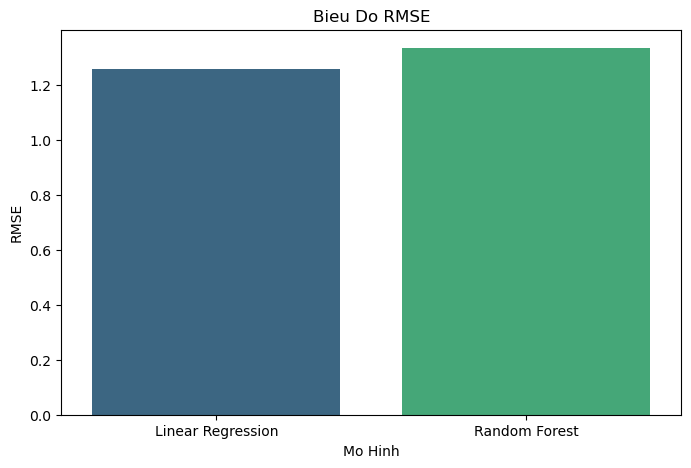

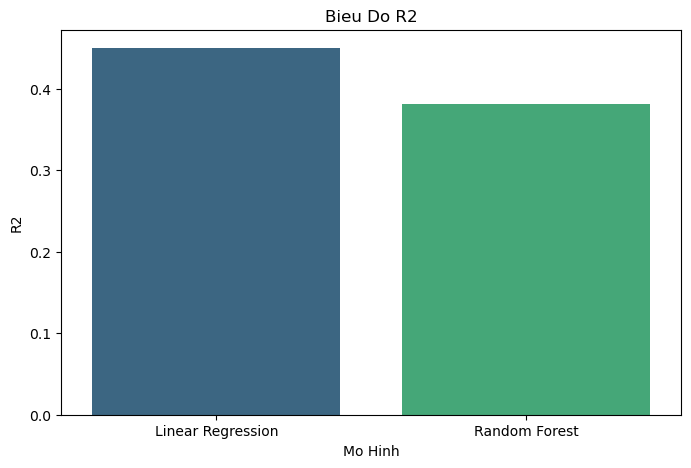

In [400]:
#Bieu Do So Sanh RMSE
plt.figure(figsize=(8, 5))
sns.barplot(data=results_regression, x='Mo Hinh', y='RMSE', hue='Mo Hinh', palette='viridis', legend=False)
plt.title('Bieu Do RMSE')
plt.ylabel('RMSE')
plt.show()

#Bieu Do R2
plt.figure(figsize=(8, 5))
sns.barplot(data=results_regression, x='Mo Hinh', y='Rˆ2', hue='Mo Hinh', palette='viridis', legend=False)
plt.title('Bieu Do R2')
plt.ylabel('R2')
plt.show()

---
Câu 2:
- Tự tìm hiểu và trình bày về vấn đề overfitting nói chung, và giải pháp giải quyết
overfitting cho các phương pháp học ở Câu 1 (lưu ý: có thể chọn 1 hoặc nhiều phương
pháp để giải quyết overfitting);
- Thực hiện code bổ sung giải pháp overfitting vào các phương pháp ở Câu 1; so sánh kết
quả với việc không sử dụng overfitting.



Khái Niệm: Overfitting là một vấn đề phổ biến trong học máy, xảy ra khi mô hình học quá kỹ các chi tiết và nhiễu trong dữ liệu huấn luyện, dẫn đến hiệu suất kém trên dữ liệu kiểm tra hoặc dữ liệu mới. Mô hình overfitting có thể có độ chính xác rất cao trên dữ liệu huấn luyện nhưng lại hoạt động kém trên dữ liệu kiểm tra.

Nguyên nhân:
1. Mô hình quá phức tạp: Mô hình có quá nhiều tham số hoặc độ phức tạp cao.
2. Dữ liệu huấn luyện không đủ: Số lượng mẫu trong dữ liệu huấn luyện quá ít so với số lượng đặc trưng.
3. Nhiễu trong dữ liệu: Dữ liệu huấn luyện chứa nhiều nhiễu hoặc giá trị ngoại lai.

Giải pháp khắc phục, giảm thiểu Overfitting:

1. K-Nearest Neighbors (KNN)

   Tăng giá trị k: Sử dụng giá trị k lớn hơn để giảm độ nhạy của mô hình đối với nhiễu.
   
   Chuẩn hóa dữ liệu: Sử dụng chuẩn hóa dữ liệu để đảm bảo rằng tất cả các đặc trưng đều có cùng thang đo.

2. Logistic Regression

    Sử dụng regularization (L1, L2): Thêm thuật ngữ phạt vào hàm mục tiêu để giảm overfitting.

3. Random Forest Regression

    Sử dụng nhiều cây hơn (n_estimators): Tăng số lượng cây trong rừng để giảm overfitting.

    Giới hạn độ sâu cây (max_depth): Giới hạn độ sâu tối đa của mỗi cây quyết định.

Về Decision Tree và Linear Regression sẽ được đề cập phía dưới.

---
CLASSIFICATION

---
Decision Tree

1. Recursive Feature Elimination (RFE) là một kỹ thuật chọn lọc đặc trưng(feature selection) giúp giảm số lượng đặc trưng đầu vào bằng cách loại bỏ dần các đặc trưng ít quan trọng nhất.

    Chỉ giữ lại các đặc trưng quan trọng nhất ---> giảm thiểu overfitting và cải thiện hiệu suất Model

2. Giới hạn độ sâu cây (max_depth),  Bằng cách giới hạn độ sâu ---> ngăn cây quyết định học quá kỹ các chi tiết và nhiễu trong dữ liệu huấn luyện ---> giảm thiểu overfitting

3. Số lượng mẫu tối thiểu để tách (min_samples_split), xác định số lượng mẫu tối thiểu cần thiết để tách một nút. 

    Bằng cách tăng giá trị này ---> ngăn cây quyết định tách quá nhiều lần ---> giảm thiểu overfitting

4. Số lượng mẫu tối thiểu tại một lá (min_samples_leaf), xác định số lượng mẫu tối thiểu cần thiết tại một lá.

    Bằng cách tăng giá trị này ---> ngăn cây quyết định tạo ra các lá quá nhỏ ---> giảm thiểu overfitting.

In [401]:
from sklearn.feature_selection import RFE

In [402]:
#Lay X,y
X=df.drop(['y', 'id', 'job', 'marital', 'education', 'contact', 
              'housing', 'loan', 'day', 'month', 'poutcome'], axis=1)
y=df['y']

#Ma hoa
#drop_first de tranh dummy variable trap
X=pd.get_dummies(X, drop_first=True)

y=pd.get_dummies(y).drop(['yes'], axis=1).rename(columns={'no': 'y'})

#In shape X,y
print("\nX shape:", X.shape)
print("y shape:", y.shape)

print(X)
print(y)


X shape: (4521, 7)
y shape: (4521, 1)
       age  balance  duration  campaign  pdays  previous  default_yes
0     30.0   1787.0      79.0         1     -1         0        False
1     33.0   4789.0     220.0         1    339         4        False
2     35.0   1350.0     185.0         1    330         1        False
3     30.0   1476.0     199.0         4     -1         0        False
4     59.0      0.0     226.0         1     -1         0        False
...    ...      ...       ...       ...    ...       ...          ...
4516  33.0   -333.0     329.0         5     -1         0        False
4517  57.0  -3313.0     153.0         1     -1         0         True
4518  57.0    295.0     151.0        11     -1         0        False
4519  28.0   1137.0     129.0         4    211         3        False
4520  44.0   1136.0     345.0         2    249         7        False

[4521 rows x 7 columns]
         y
0     True
1     True
2     True
3     True
4     True
...    ...
4516  True
4517  Tr

In [403]:
X_train_re, X_test_re, y_train_re, y_test_re=train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [404]:
#Khoi tao Decision Tree
classifier_initial=DecisionTreeClassifier(random_state=0)

In [405]:
#Ap dung RFE de chon loc dac trung, Chon 5 dac trung quan trong nhat
rfe=RFE(estimator=classifier_initial, n_features_to_select=5)  
rfe.fit(X_train_re, y_train_re.values.ravel())

RFE(estimator=DecisionTreeClassifier(random_state=0), n_features_to_select=5)

In [406]:
#Huan luyen mo hinh voi cac dac trung da chon
classifier_DT=DecisionTreeClassifier(
    criterion='entropy',
    max_depth=10,            #Gioi han do sau cay
    min_samples_split=10,    #So luong mau toi thieu de tach
    min_samples_leaf=5,      #So luong mau toi thieu tai mot la
    random_state=0
)

In [407]:
#Huan luyen mo hinh
classifier_DT.fit(X_train_re[X_train_re.columns[rfe.support_]], y_train_re.values.ravel())

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       min_samples_split=10, random_state=0)

In [408]:
#Du doan tren tap kiem tra
y_pred_DT=classifier_DT.predict(X_test_re[X_train_re.columns[rfe.support_]])

In [409]:
#Tinh toan cac chi so
acc_DT=accuracy_score(y_test_re, y_pred_DT)
prec_DT=precision_score(y_test_re, y_pred_DT, pos_label=True) 
rec_DT=recall_score(y_test_re, y_pred_DT, pos_label=True)
f1_DT=f1_score(y_test_re, y_pred_DT, pos_label=True)

In [410]:
#Tao DataFrame ket qua cho Decision Tree da dieu chinh
model_results_DT_fitting=pd.DataFrame(
    [['Decision Tree (fitting)', acc_DT, prec_DT, rec_DT, f1_DT]],
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
)

model_results_DT_fitting_results=pd.concat([model_results_DT, model_results_DT_fitting], ignore_index=True)

#In ket qua
print(model_results_DT_fitting_results)

                     Model  Accuracy  Precision    Recall  F1 Score
0            Decision Tree  0.845201   0.914573  0.910000  0.912281
1  Decision Tree (fitting)  0.867403   0.911729  0.941323  0.926290


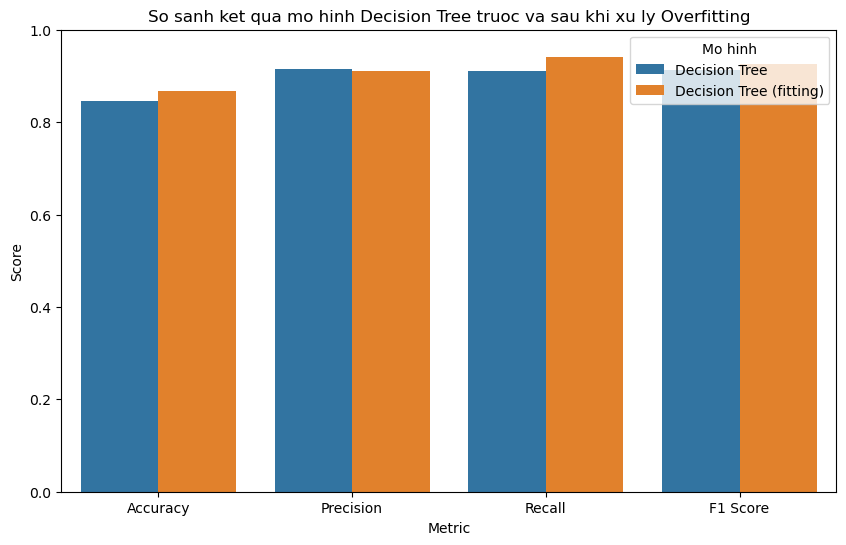

In [411]:
#dinh dang lai du lieu cho seaborn
results_melted=model_results_DT_fitting_results.melt(id_vars='Model', var_name='Metric', value_name='Score')

#Ve bieu do
plt.figure(figsize=(10, 6))
sns.barplot(data=results_melted, x='Metric', y='Score', hue='Model')
plt.title('So sanh ket qua mo hinh Decision Tree truoc va sau khi xu ly Overfitting')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.ylim(0, 1)
plt.legend(title='Mo hinh')
plt.show()

---
REGRESSION

---
Linear Regression

Để cải thiện hiệu suất của mô hình Linear Regression --> đảm bảo fitting tốt ---> Dùng Ridge Regression với Grid Search

Ridge Regression là một kỹ thuật regularization bằng cách thêm một thuật ngữ phạt vào hàm mục tiêu của Linear Regression --->  giúp giảm overfitting 

In [412]:
X=df[['balance', 'duration','marital', 'education', 'default', 'housing', 'loan', 'contact', 'age', 'pdays', 'campaign', 'poutcome']]
y=df['previous']
X=pd.get_dummies(X, columns=['marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome'], drop_first=True)
X_train_linear, X_test_linear, y_train_linear, y_test_linear=train_test_split(X, y, test_size=0.05, random_state=42)

In [413]:
#Thiet lap cac tham so cho Ridge
alpha_values=np.logspace(-4, 4, 90)

In [414]:
#Ridge Regression voi tim kiem Grid Search
ridge_model=Ridge()
ridge_params={'alpha': alpha_values}
ridge_grid_search=GridSearchCV(ridge_model, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid_search.fit(X_train_linear, y_train_linear)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-04, 1.22995052e-04, 1.51277828e-04, 1.86064243e-04,
       2.28849813e-04, 2.81473946e-04, 3.46199027e-04, 4.25807673e-04,
       5.23722369e-04, 6.44152600e-04, 7.92275825e-04, 9.74460063e-04,
       1.19853766e-03, 1.47414202e-03, 1.81312174e-03, 2.23005003e-03,
       2.74285120e-03, 3.37357126e-03, 4.14932572e-03, 5....
       1.29526774e+02, 1.59311524e+02, 1.95945291e+02, 2.41003013e+02,
       2.96421781e+02, 3.64584124e+02, 4.48420433e+02, 5.51534944e+02,
       6.78360691e+02, 8.34350085e+02, 1.02620932e+03, 1.26218669e+03,
       1.55242717e+03, 1.90940861e+03, 2.34847811e+03, 2.88851187e+03,
       3.55272668e+03, 4.36967803e+03, 5.37448777e+03, 6.61035402e+03,
       8.13040837e+03, 1.00000000e+04])},
             scoring='neg_mean_squared_error')

In [415]:
#Mo hinh tot nhat
best_ridge=ridge_grid_search.best_estimator_

In [416]:
#Du doan tren tap kiem tra
y_pred_ridge=best_ridge.predict(X_test_linear)

In [417]:
#Danh gia mo hinh
mse_ridge=mean_squared_error(y_test_linear, y_pred_ridge)
rmse_ridge=np.sqrt(mse_ridge)
r2_ridge=r2_score(y_test_linear, y_pred_ridge)

Best Ridge Alpha là giá trị của tham số alpha trong Ridge Regression mà Grid Search đã tìm thấy là tốt nhất cho mô hình. Tham số alpha trong Ridge Regression điều chỉnh mức độ regularization được áp dụng cho mô hình.

Ridge Regression là một biến thể của Linear Regression, trong đó một thuật ngữ phạt(penalty term) được thêm vào hàm mục tiêu để giảm overfitting. Thuật ngữ phạt này là bình phương của các hệ số hồi quy, nhân với một tham số alpha.

In [418]:
#Ket qua
print(f'Ridge Regression RMSE: {rmse_ridge}')
print(f'Ridge Regression R²: {r2_ridge}')
print(f'Best Ridge Alpha: {ridge_grid_search.best_params_}')

Ridge Regression RMSE: 1.178445274829516
Ridge Regression R²: 0.510961426030835
Best Ridge Alpha: {'alpha': 3.1216342887834396}


In [419]:
#Luu lai kq de so sanh mo hinh
results_regression_fitting_Compare=pd.DataFrame({'Mo Hinh': ['Linear Regression', 'Linear Regression Fitting'],
    'RMSE': [rmse_linear, rmse_ridge],
    'Rˆ2': [r2_linear, r2_ridge]
})
print(results_regression_fitting_Compare.head())

                     Mo Hinh      RMSE       Rˆ2
0          Linear Regression  1.256744  0.449705
1  Linear Regression Fitting  1.178445  0.510961


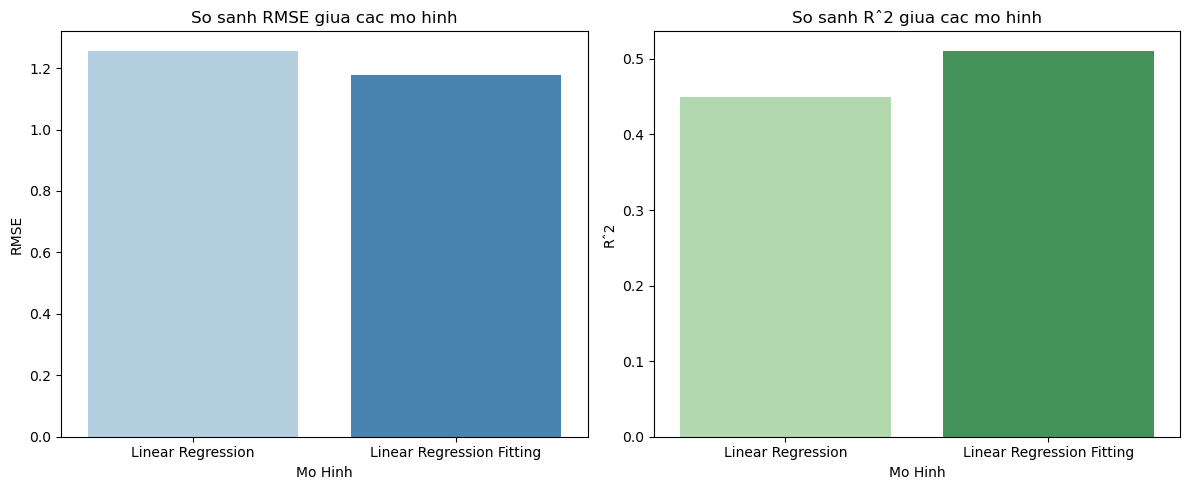

In [420]:
#Ve bieu do cho RMSE va Rˆ2
plt.figure(figsize=(12, 5))

#Bieu do RMSE
plt.subplot(1, 2, 1)
sns.barplot(x='Mo Hinh', y='RMSE', data=results_regression_fitting_Compare, palette='Blues', hue='Mo Hinh', legend=False)
plt.title('So sanh RMSE giua cac mo hinh')
plt.xlabel('Mo Hinh')
plt.ylabel('RMSE')

#Bieu do R²
plt.subplot(1, 2, 2)
sns.barplot(x='Mo Hinh', y='Rˆ2', data=results_regression_fitting_Compare, palette='Greens', hue='Mo Hinh', legend=False)
plt.title('So sanh Rˆ2 giua cac mo hinh')
plt.xlabel('Mo Hinh')
plt.ylabel('Rˆ2')

#Hien thi bieu do
plt.tight_layout()
plt.show()

---
Câu 3:
- Tìm hiểu và trình bày Feature selection using correlation analysis. Áp dụng vào bài toán
trên đối với các phương pháp ở Câu 1.

---
Feature selection là quá trình chọn ra những đặc trưng (features) có ảnh hưởng lớn nhất đến biến mục tiêu trong một tập dữ liệu. Việc này giúp cải thiện độ chính xác của mô hình, giảm thiểu độ phức tạp và thời gian huấn luyện.

1. Tại sao Feature Selection Quan Trọng?

    1.1 Giảm thiểu overfitting: Mô hình phức tạp với quá nhiều đặc trưng dễ bị overfitting, tức là mô hình quá khớp với dữ liệu huấn luyện mà không tổng quát được cho dữ liệu mới.

    1.2 Tăng cường hiệu suất: Việc chọn lựa các đặc trưng quan trọng giúp mô hình hoạt động hiệu quả hơn.

    1.3 Tiết kiệm thời gian và tài nguyên: Một mô hình đơn giản hơn với ít đặc trưng sẽ giảm thiểu thời gian huấn luyện và tài nguyên tính toán.

2. Phân Tích Tương Quan (Correlation Analysis)

    2.1 Phân tích tương quan là phương pháp giúp xác định mối quan hệ giữa các đặc trưng và biến mục tiêu. Tương quan thường được đo bằng hệ số tương quan Pearson (cho các biến liên tục) hoặc hệ số tương quan Spearman (cho các biến thứ tự).

    2.2 Hệ số tương quan Pearson:

        Biểu thị mối quan hệ tuyến tính giữa hai biến.

        Giá trị nằm trong khoảng [-1, 1]: 1: Tương quan dương hoàn hảo, -1: Tương quan âm hoàn hảo, 0: Không có tương quan.

    2.3 Hệ số tương quan Spearman:
    Đo lường mối quan hệ giữa hai biến mà không giả định tính tuyến tính.
    Thích hợp cho các biến không tuân theo phân phối chuẩn.

3. Quy Trình Feature Selection Using Correlation Analysis

    3.1 Tính toán hệ số tương quan: Sử dụng phương pháp Pearson hoặc Spearman để tính toán hệ số tương quan giữa các đặc trưng và biến mục tiêu.

    3.2 Chọn các đặc trưng có tương quan cao: Chọn các đặc trưng có hệ số tương quan lớn hơn một ngưỡng nhất định (ví dụ: 0.5 hoặc -0.5). Điều này giúp đảm bảo rằng các đặc trưng đã chọn có ảnh hưởng rõ rệt đến biến mục tiêu.
    
    3.3 Loại bỏ các đặc trưng tương quan cao với nhau: Nếu hai hoặc nhiều đặc trưng có mối tương quan cao với nhau (ví dụ: trên 0.8), có thể loại bỏ một trong số đó để giảm thiểu đa cộng tuyến (multicollinearity).




---
Dicision Tree

In [421]:
#X,y
X=df.drop(['y', 'id', 'job', 'marital', 'education', 'contact', 
             'housing', 'loan', 'day', 'month', 'poutcome'], axis=1)
y=df['y']

#Ma hoa
X=pd.get_dummies(X, drop_first=True)
y=pd.get_dummies(y).drop(['yes'], axis=1).rename(columns={'no': 'y'})

#In shape X, y
print("\nX shape:", X.shape)
print("y shape:", y.shape)


X shape: (4521, 7)
y shape: (4521, 1)


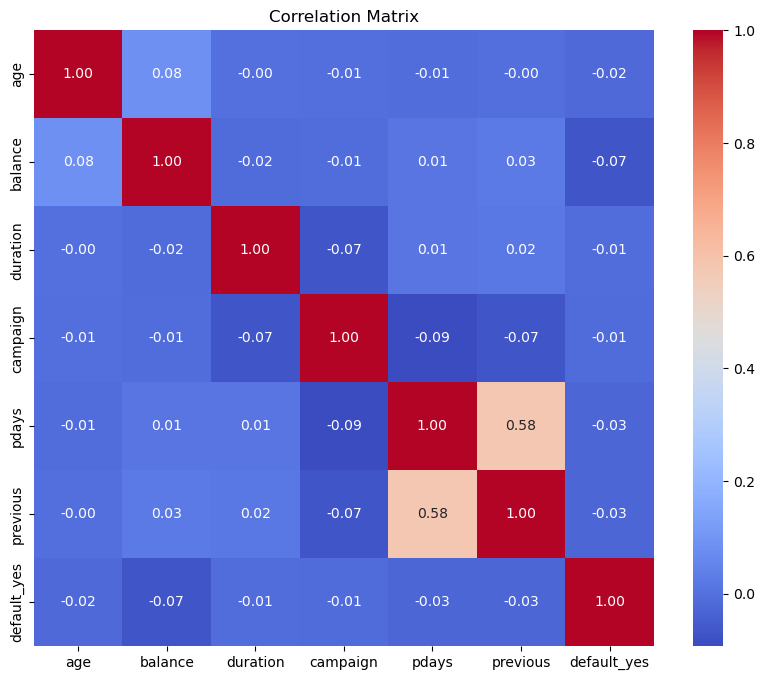

In [422]:
#Tinh toan ma tran tuong quan cho cac dac trung so
correlation_matrix=X.corr()

#Ve heatmap de hien thi moi tuong quan
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [423]:
#nguong tuong quan de chon loc dac trung
correlation_threshold=0.1

#Tinh toan he so tuong quan giua tung dac trung va bien muc tieu 'y'
target_correlation=X.apply(lambda x: x.corr(y['y'])).abs()

#Chon cac dac trung co moi tuong quan cao voi bien muc tieu
selected_features=target_correlation[target_correlation > correlation_threshold].index.tolist()

#Loai bo cac dac trung co moi tuong quan cao voi nhau
def remove_highly_correlated_features(correlation_matrix, features, threshold=0.8):
    to_remove=set()
    for i in range(len(features)):
        for j in range(i + 1, len(features)):
            if abs(correlation_matrix.loc[features[i], features[j]]) > threshold:
                to_remove.add(features[j])
    return [feature for feature in features if feature not in to_remove]

selected_features=remove_highly_correlated_features(correlation_matrix, selected_features)

print("Chon cac dt:", selected_features)


Chon cac dt: ['duration', 'pdays', 'previous']


In [424]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [425]:
#Ap dung cac dac trung da chon vao mo hinh Decision Tree Classification
X_train_selected=X_train[selected_features]
X_test_selected=X_test[selected_features]

#Kiem tra kich thuoc va kieu du lieu cua X_train_re_selected va y_train_re
print("\nX_train_selected shape:", X_train_selected.shape)
print("y_train shape:", y_train.shape)
print("X_train_selected types:\n", X_train_selected.dtypes)
print("y_train types:\n", y_train.dtypes)


X_train_selected shape: (3616, 3)
y_train shape: (3616, 1)
X_train_selected types:
 duration    float64
pdays         int64
previous      int64
dtype: object
y_train types:
 y    bool
dtype: object


In [426]:
#Khoi tao mo hinh Decision Tree
classifier_DT=DecisionTreeClassifier(random_state=0, max_depth=10, min_samples_split=10, min_samples_leaf=5)

In [427]:
#Huan luyen mo hinh
classifier_DT.fit(X_train_selected, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                       random_state=0)

In [428]:
#Du doan tren tap kiem tra
y_pred=classifier_DT.predict(X_test_selected)

#Tinh toan cac chi so hieu suat
acc=accuracy_score(y_test, y_pred)
prec=precision_score(y_test, y_pred, average='weighted')
rec=recall_score(y_test, y_pred, average='weighted')
f1=f1_score(y_test, y_pred, average='weighted')

#Tao DataFrame ket qua cho Decision Tree
model_results_DT_fitting=pd.DataFrame(
    [['Decision Tree (FS)', acc, prec, rec, f1]],
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
)

print(model_results_DT_fitting)

                Model  Accuracy  Precision    Recall  F1 Score
0  Decision Tree (FS)  0.893923   0.888321  0.893923  0.890855


In [429]:
model_results_DT_FS=pd.concat([model_results_DT_fitting_results, model_results_DT_fitting], ignore_index=True)
print(model_results_DT_FS)

                     Model  Accuracy  Precision    Recall  F1 Score
0            Decision Tree  0.845201   0.914573  0.910000  0.912281
1  Decision Tree (fitting)  0.867403   0.911729  0.941323  0.926290
2       Decision Tree (FS)  0.893923   0.888321  0.893923  0.890855


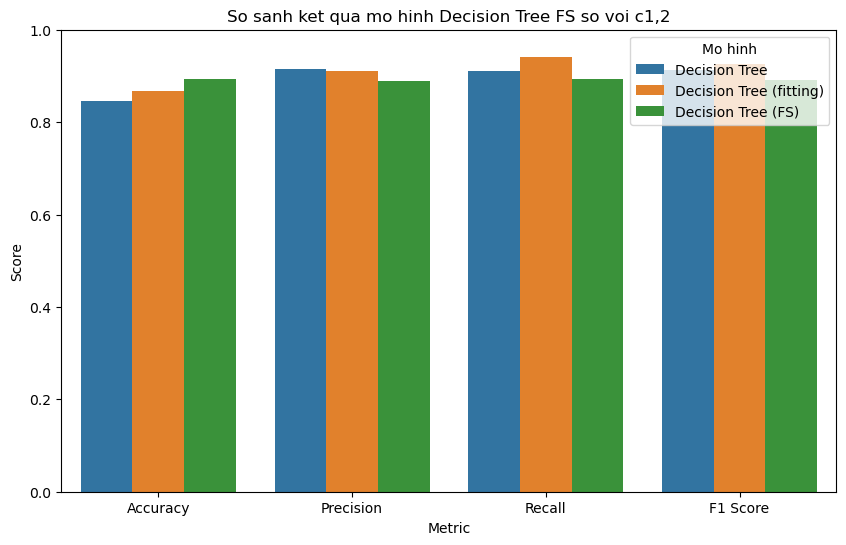

In [430]:
#dinh dang lai du lieu cho seaborn
results_melted2=model_results_DT_FS.melt(id_vars='Model', var_name='Metric', value_name='Score')

#Ve bieu do
plt.figure(figsize=(10, 6))
sns.barplot(data=results_melted2, x='Metric', y='Score', hue='Model')
plt.title('So sanh ket qua mo hinh Decision Tree FS so voi c1,2')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.ylim(0, 1)
plt.legend(title='Mo hinh')
plt.show()

---
Linear Regression

In [431]:
#X,y
X=df[['balance', 'duration','marital', 'education', 'default', 'housing', 'loan', 'contact', 'age', 'pdays', 'campaign', 'poutcome']]
y=df['previous']

#One-Hot Encoding
X=pd.get_dummies(X, columns=['marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome'], drop_first=True)


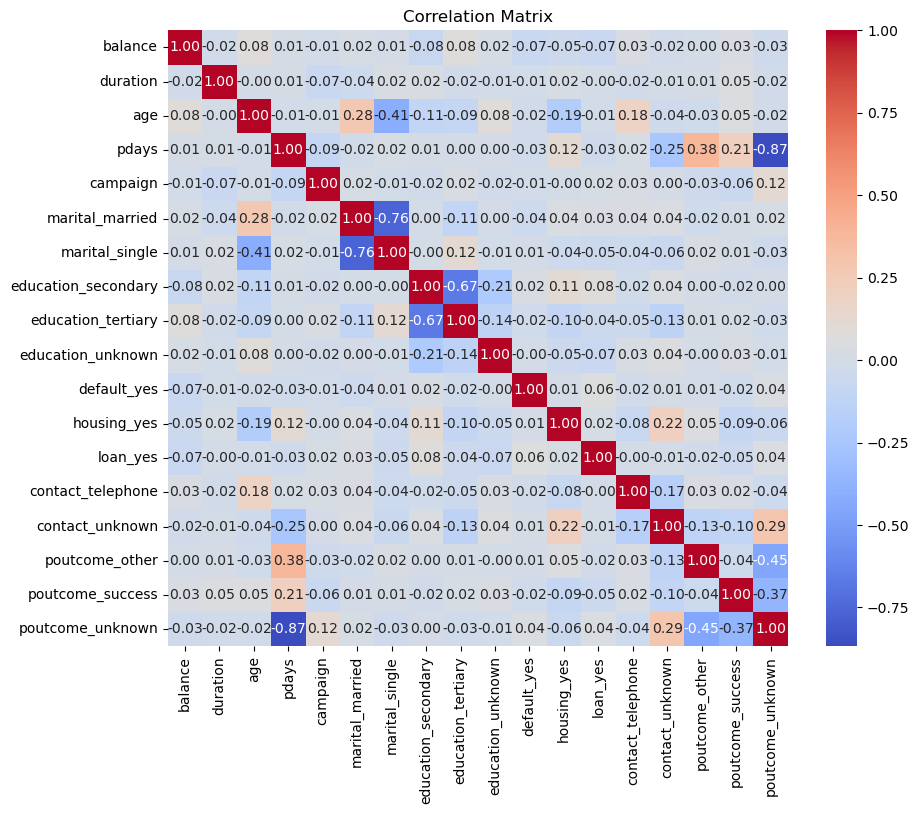

In [432]:
#Tinh toan ma tran tuong quan cho cac dac trung so
correlation_matrix=X.corr()

#Ve heatmap de hien thi moi tuong quan
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [433]:
print(correlation_matrix)

                      balance  duration       age     pdays  campaign  \
balance              1.000000 -0.015950  0.083820  0.009437 -0.009976   
duration            -0.015950  1.000000 -0.002367  0.010380 -0.068382   
age                  0.083820 -0.002367  1.000000 -0.008894 -0.005148   
pdays                0.009437  0.010380 -0.008894  1.000000 -0.093137   
campaign            -0.009976 -0.068382 -0.005148 -0.093137  1.000000   
marital_married      0.017158 -0.036436  0.275139 -0.016537  0.022000   
marital_single       0.007525  0.024560 -0.410768  0.020693 -0.008093   
education_secondary -0.076574  0.023179 -0.106872  0.011899 -0.019510   
education_tertiary   0.076487 -0.017779 -0.094042  0.000377  0.022631   
education_unknown    0.019230 -0.010802  0.081111  0.004601 -0.020508   
default_yes         -0.070886 -0.011615 -0.017885 -0.026317 -0.012348   
housing_yes         -0.050227  0.015740 -0.193888  0.116893 -0.003574   
loan_yes            -0.071349 -0.004997 -0.011250 -

In [434]:
#Nguong tuong quan de chon loc dac trung
correlation_threshold=0.3

#Tinh toan he so tuong quan giua tung dac trung va bien muc tieu
target_correlation=X.apply(lambda x: x.corr(y)).abs()

#Chon cac dac trung co moi tuong quan cao voi bien muc tieu
selected_features=target_correlation[target_correlation > correlation_threshold].index.tolist()

#Loai bo cac dac trung co moi tuong quan cao voi nhau
def remove_highly_correlated_features(correlation_matrix, features, threshold=0.8):
    to_remove=set()
    for i in range(len(features)):
        for j in range(i + 1, len(features)):
            if abs(correlation_matrix.loc[features[i], features[j]]) > threshold:
                to_remove.add(features[j])
    return [feature for feature in features if feature not in to_remove]

selected_features=remove_highly_correlated_features(correlation_matrix, selected_features)

print("Chon cac dt:", selected_features)

Chon cac dt: ['pdays', 'poutcome_other']


In [435]:
#Ap dung cac dac trung da chon vao mo hinh Linear Regression
X_selected=X[selected_features]

In [436]:
#Chia du lieu thanh tap huan luyen va tap kiem tra
X_train_linear, X_test_linear, y_train_linear, y_test_linear=train_test_split(X_selected, y, test_size=0.25, random_state=42)

#Khoi tao mo hinh Linear Regression
linear_model=LinearRegression()

#Huan luyen mo hinh
linear_model.fit(X_train_linear, y_train_linear)

#Du doan tren tap kiem tra
y_pred_linear=linear_model.predict(X_test_linear)

#Tinh toan cac chi so hieu suat
mse_linear=mean_squared_error(y_test_linear, y_pred_linear)
rmse_linear_FS=np.sqrt(mse_linear)
r2_linear_FS=r2_score(y_test_linear, y_pred_linear)

In [437]:
#Ket qua
print(f'Linear Regression RMSE: {rmse_linear_FS}')
print(f'Linear Regression R²: {r2_linear_FS}')

Linear Regression RMSE: 1.1282281302636747
Linear Regression R²: 0.41720812959733755


In [438]:
results_regression_FS_Coma=pd.DataFrame({'Mo Hinh': ['Linear Regression', 'Linear Regression Fitting', 'Linear Regression FS'],
    'RMSE': [rmse_linear, rmse_ridge, rmse_linear_FS],
    'Rˆ2': [r2_linear, r2_ridge, r2_linear_FS]
})

In [439]:
print(results_regression_FS_Coma)

                     Mo Hinh      RMSE       Rˆ2
0          Linear Regression  1.256744  0.449705
1  Linear Regression Fitting  1.178445  0.510961
2       Linear Regression FS  1.128228  0.417208


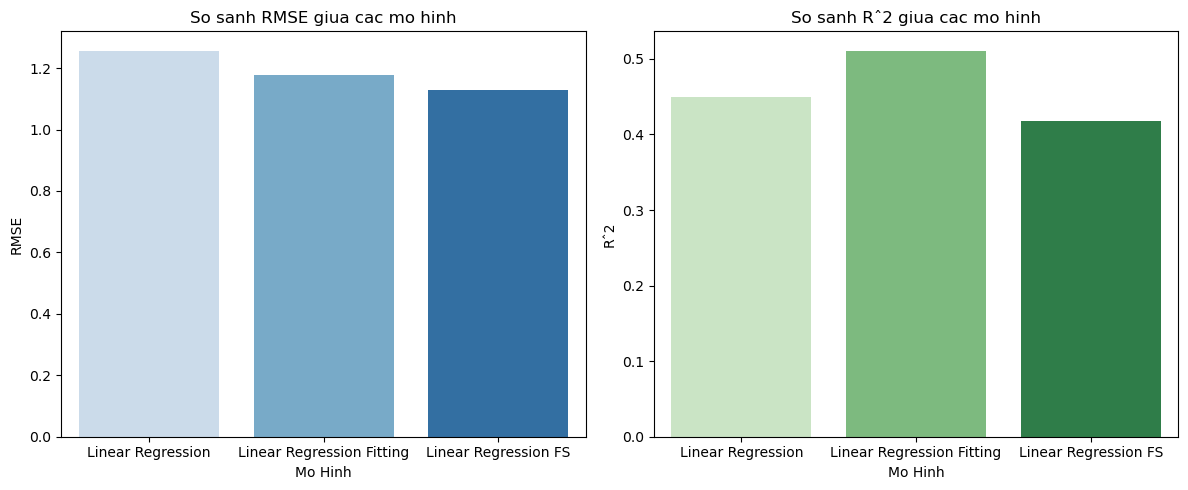

In [440]:
#Ve bieu do cho RMSE va Rˆ2
plt.figure(figsize=(12, 5))

#Bieu do RMSE
plt.subplot(1, 2, 1)
sns.barplot(x='Mo Hinh', y='RMSE', data=results_regression_FS_Coma, palette='Blues', hue='Mo Hinh', legend=False)
plt.title('So sanh RMSE giua cac mo hinh')
plt.xlabel('Mo Hinh')
plt.ylabel('RMSE')

#Bieu do R²
plt.subplot(1, 2, 2)
sns.barplot(x='Mo Hinh', y='Rˆ2', data=results_regression_FS_Coma, palette='Greens', hue='Mo Hinh', legend=False)
plt.title('So sanh Rˆ2 giua cac mo hinh')
plt.xlabel('Mo Hinh')
plt.ylabel('Rˆ2')

#Hien thi bieu do
plt.tight_layout()
plt.show()